In [ ]:
# Here we will center on an energy density study of our Sample 2 of young pulsars. We also 
# checked them individually in the TeVCat Catalogue to see if they have TeV PWNe detected 
# firmly identified, possible candidates, or not TeV detected.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

%matplotlib inline

# Function which returns tau0 from Equation 2.3 of the report
def ftau0(tau,P,Pzero):
    return tau*(Pzero/P)**2

# Function which returns Edot0 from Equation 2.2 of the report
def fEdot(Edott,tt,ttau0):
    return Edott*(1 + tt/ttau0)**(2)

# Radius evolution period for young pulsars from Equations 1.4 and 1.5
def fcalcR(Edot0,tau0,t):
    if t <= tau0:
        return 1.1 * ( Edot0/(10**38) )**(0.2) * (t/(10**3))**(1.2)
    elif t > tau0:
        return 1.1 * (Edot0/(10**38))**(0.2) * (tau0/(10**3))**(1.2) * (1/tau0) * t

# We charge Sample 2 from our text file from ATNF catalogue
data = np.genfromtxt('Ageless7kyrwithperiodnolabels.txt', dtype=np.str)
Edot = data.T[24].astype(np.float)# Array of Edot in erg / s
tau = data.T[22].astype(np.float) # Array of characteristic age (tau) in yr 
distance = data.T[20].astype(np.float) # Array of distance in kpc!!
Pdot = data.T[16].astype(np.float) # Array of Pdot in seconds / seconds
P = data.T[12].astype(np.float) # Array of P in seconds
names = data.T[2].astype(np.str) # Array of names

distance = distance * 10**3 # Convert distance to parsecs

#We first obtain Edot and tau0 for each pulsar
N = len(Edot)
tau0 = np.zeros(N)
Edot0 = np.zeros(N)
numbers = range(0,N)
for n in numbers:
    # We obtain tau0 and Edot0 for each pulsar
    tau0[n]=ftau0(tau[n], P[n], 0.03) # Assuming P0=30 ms
    Edot0[n]=fEdot(Edot[n], tau[n], tau0[n])

epsilon = np.zeros(N) # Future array of energy density
epsilon2 = np.zeros(N) # Future array of energy density over distance square
currentradius = np.zeros(N) # Future array of radius
# We obtain energy density
for i in numbers:
    # Obtain radius in cm to obtain volume in cm3 (energy density in eV/cm3)
    currentradius[i] = fcalcR(Edot0[i], tau0[i], tau[i])*3.086*10**18 # in cm!
    Vol = 4/3*np.pi*currentradius[i]**3 # in cm3!
    # Units: erg / s * yr /cm3... Must convert erg to eV and years to seconds
    epsilon[i] = Edot[i]*tau[i]*3600*24*365*6.242*10**11/Vol # in eV/cm3! 
    epsilon2[i] = epsilon[i]/distance[i]**2 
currentradius = currentradius/(3.086*10**18) # Convert radius back to pc
print('Data charged')

Data charged



 X axis: 
 [2.95857988e+26 2.40784780e+29 2.35307622e+26 1.12500000e+32
 6.25000000e+27 8.78099174e+29 3.25963719e+28 6.07265322e+28
 6.91358025e+25 4.80000000e+29 2.44897959e+29 2.70665129e+28
 1.88706634e+26 1.07421875e+25 2.54252959e+30 2.02260559e+30
 1.98373339e+29 6.48962565e+29 2.63671875e+30 2.53508375e+30
 3.92807140e+23]

 X axis mean 5.955023573945419e+30

 Y axis: 
 [2.34413610e-07 1.68292502e-05 8.38743711e-09 1.29932136e-03
 1.20475831e-07 1.31711374e-05 4.73207094e-07 5.61134701e-07
 3.61585070e-10 2.09011825e-06 1.01716306e-06 8.80672600e-08
 6.12381031e-10 1.92475811e-11 4.13464901e-06 2.49126610e-06
 1.07007510e-07 6.15756722e-07 2.73322567e-06 1.94021531e-06
 3.27959778e-13]

 Y axis mean 6.409227741248148e-05

 Distances: 
 [13000.  5800. 13200.  2000.  4000.  4400.  8400. 49700.  9000.  5000.
  7000. 12750.  8300.  9600.  2080.  4100. 49700.  8140.  3200.  4700.
 59700.]

 Characteristic age: 
 [ 218.  728. 1030. 1260. 1410. 1560. 1610. 1670. 2680. 2850. 2890. 335

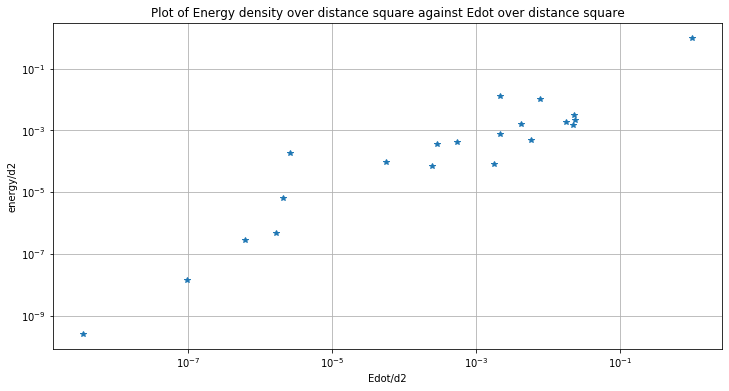

In [3]:
# Here we make a first plot with just the data
ejey = np.zeros(N)
ejex = np.zeros(N)
LogE = np.zeros(N)
Logep = np.zeros(N)
for i in numbers:
    ejex[i] = Edot[i]/distance[i]**2
    ejey[i] = epsilon2[i]
    LogE[i] = np.log10(Edot[i])
    Logep[i] = np.log10(epsilon[i])
# WE FIRST NORMALISE THE PLOT
maxy = max(ejey) # Normalisation of y axis (it's Crab value)
maxx = max(ejex) # Normalisation of x axis (it's Crab value)
newejey = np.zeros(N)
newejex = np.zeros(N)
# OBTAIN NORMALISE AXIS
for i in numbers:
    newejex[i] = ejex[i]/maxx
    newejey[i] = ejey[i]/maxy

plt.rcParams['figure.figsize'] = (12, 6)
plt.loglog(newejex, newejey,'*')
plt.title('Plot of Energy density over distance square against Edot over distance square')
plt.ylabel('energy/d2')
plt.xlabel('Edot/d2')


plt.grid(True)
#plt.show()

# First conclusions about the plot
print('\n X axis: \n', ejex)
print('\n X axis mean', np.mean(ejex))
print('\n Y axis: \n', ejey)
print('\n Y axis mean', np.mean(ejey))
print('\n Distances: \n', distance)
print('\n Characteristic age: \n', tau)
print('\n Logarithm Etotal: \n', LogE)

print('\n From the values above, we can compare them with Table 1 from HESS population paper and conclude:')
print('J1833-1034 is number 15')
print('J1813-1749 is number 19')
print('J1930+1852 is number 10')
print('J1846-0258 is number 1')
print('J1513-5908, named J1514-591 too, is number 5')
print('J1119-6127 is number 6')
print('J0537-6910 (N157B) is number 16')
print('J0534-3810 (Crab Nebula) is number 3')
print('J1747-2809 (G0.9+0.1) is number 17')
print('J0205+6449 (3C 58) is number 18')


['J1846-0258' 'J0534+2200' 'J1119-6127' 'J1930+1852' 'J1640-4631'
 'J1023-5746' 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449'
 'J1813-1749']
[3.36930038e-04 2.67973856e-04 7.11764706e-03 1.00000000e+00
 6.91568038e-02 7.87334786e-05 5.46635294e-01 2.14903555e-04
 1.22334559e-05 4.47338014e-07] [1.77975223e-02 6.36804315e-04 9.14695726e-03 1.00000000e+00
 4.26033596e-02 2.74528357e-05 1.58689276e-01 4.64941648e-05
 1.46134540e-06 2.48998829e-08]


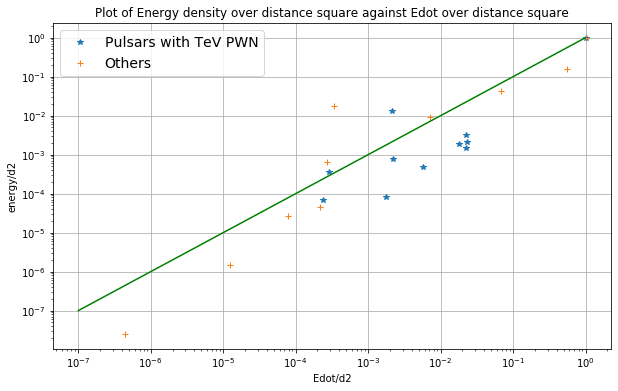

The correlation matrix is: 
 [[1.        0.9627962]
 [0.9627962 1.       ]]
0 J1808-2024 0.0021403091557669444 0.012952338621969074 5e+34 13000.0
2 J1714-3810 0.000289745527840766 0.0003641955793120232 4.1e+34 13200.0
4 J1550-5418 0.00024059122559699265 6.777942925125954e-05 1e+35 4000.0
5 J1513-5908 0.022600262984878373 0.003182160431249746 1.7e+37 4400.0
7 J0540-6919 0.001763318565540347 8.235646189737539e-05 1.5e+38 49700.0
8 J1050-5953 0.005768556137106504 0.00047390641207648373 5.6e+33 9000.0
9 J1124-5916 0.0234375 0.0021035794245066798 1.2e+37 5000.0
12 J1745-2900 0.0002679738562091503 0.0006368043149789476 1.3e+34 8300.0
13 J1841-0456 0.007117647058823529 0.009146957257483922 9.9e+32 9600.0
20 J0100-7211 4.473380136799213e-07 2.4899882891124132e-08 1.4e+33 59700.0
[1, 3, 6, 10, 11, 14, 15, 16, 17, 18, 19]
21
[2.14030916e-03 1.00000000e+00 2.89745528e-04 2.17687075e-03
 2.40591226e-04 2.26002630e-02 1.79787164e-02 1.76331857e-03
 5.76855614e-03 2.34375000e-02 2.25340778e-02 3.369

In [6]:
# Here we divide pulsars according to the TeV detection selection
# To see which pulsars are the one from the paper
ejey1 = []
ejex1 = []
ejex2 = []
ejey2 = []
known = [1, 3, 6, 10, 11, 14, 15, 16, 17, 18, 19] # checked one by one
for i in numbers:
    if i in known:
        ejex1 = ejex1 + [Edot[i]/distance[i]**2]
        ejey1 = ejey1 + [epsilon2[i]]
    else:
        ejex2 = ejex2 + [Edot[i]/distance[i]**2]
        ejey2 = ejey2 + [epsilon2[i]]
print(names[known])
# NORMALISED PLOT 
maxy1 = max(ejey1)
maxx1 = max(ejex1)
maxx2 = max(ejex2)
maxy2 = max(ejey2)

newejey1 = np.zeros(len(ejey1))
newejex1 = np.zeros(len(ejex1))
newejey2 = np.zeros(len(ejey2))
newejex2 = np.zeros(len(ejex2))

for j in range(0,len(ejey1)):
    newejex1[j] = ejex1[j]/maxx1
    newejey1[j] = ejey1[j]/maxy1

for l in range(0,len(ejey2)):
    newejex2[l] = ejex2[l]/maxx2
    newejey2[l] = ejey2[l]/maxy2
               

x1 = np.linspace(10**(-7),1,50)
plt.rcParams['figure.figsize'] = (10, 6)
#plt.loglog(ejey, ejex,'*')
plt.loglog(newejex1, newejey1,'*',label='Pulsars with TeV PWN')
plt.loglog(newejex2, newejey2,'+',label='Others')
print(newejex2, newejey2)
plt.loglog(x1, x1,'g')
plt.title('Plot of Energy density over distance square against Edot over distance square')
plt.ylabel('energy/d2')
plt.xlabel('Edot/d2')

plt.legend(loc='best', fontsize=14)

plt.grid(True)
plt.show()
newejeynorm = np.concatenate([newejey1, newejey2])

newejexnorm = np.concatenate([newejex1, newejex2])
datax = np.concatenate([newejex1,newejex2])
datay = np.concatenate([newejey1,newejey2])

print('The correlation matrix is: \n', np.corrcoef(datax, datay))
o = 0
for u in range(0,len(datax)):
    if not u in known:
        print(u, names[u],newejexnorm[u], newejeynorm[u], Edot[u], distance[u])
        o += 1

print(known)
print(len(names))
print(datax)
print(datay)

In [7]:

##################################### PULSARS WITH CHARACTERISTIC AGE < 7 KYR ####################################
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
#from scipy.stats import norm

#import plotly.plotly as py
#import plotly.tools as tls


discovered = ['J1808-2024', 'J1714-3810', 'J1550-5418', 'J1513-5908', 'J0540-6919', 'J1050-5953', 'J1124-5916', 
            'J1745-2900', 'J1841-0456', 'J0100-7211']
# In fact, those are the undiscovered ones, so inside the loop if the name is not in this, then is discovered

truth = np.zeros(len(names), dtype=bool)
for i in range(0,len(names)):
    if not names[i] in discovered:
        truth[i] = True
print(truth)

# Data for the axis
numbers = range(0,len(names))
axisy = np.zeros(len(names))
axisx = np.zeros(len(names))
for i in numbers:
    axisx[i] = Edot[i]/distance[i]**2
    axisy[i] = epsilon2[i]


# NORMALISED PLOT 
maxy = max(axisy)
maxx = max(axisx)


newaxisx = np.zeros(len(axisx))
newaxisy = np.zeros(len(axisy))

for j in numbers:
    newaxisx[j] = axisx[j]/maxx
    newaxisy[j] = axisy[j]/maxy

print(newaxisx)
print(newaxisy)

[False  True False  True False False  True False False False  True  True
 False False  True  True  True  True  True  True False]
[2.62984878e-06 2.14030916e-03 2.09162330e-06 1.00000000e+00
 5.55555556e-05 7.80532599e-03 2.89745528e-04 5.39791398e-04
 6.14540466e-07 4.26666667e-03 2.17687075e-03 2.40591226e-04
 1.67739230e-06 9.54861111e-08 2.26002630e-02 1.79787164e-02
 1.76331857e-03 5.76855614e-03 2.34375000e-02 2.25340778e-02
 3.49161902e-09]
[1.80412343e-04 1.29523386e-02 6.45524455e-06 1.00000000e+00
 9.27221198e-05 1.01369359e-02 3.64195579e-04 4.31867527e-04
 2.78287637e-07 1.60862303e-03 7.82841789e-04 6.77794293e-05
 4.71308370e-07 1.48135648e-08 3.18216043e-03 1.91735946e-03
 8.23564619e-05 4.73906412e-04 2.10357942e-03 1.49325284e-03
 2.52408518e-10]


[False False False False False False False False  True False False False
  True  True False False False False False False  True]
6
The yellow ones are not firmly identified, we dont know if they are from the pulsar or the supernova remmant.
 The ones below 10**-6 have not been detected yet. It would be interesting to plot them in another color
The correlation matrix is: 
 [[1.         0.99925357]
 [0.99925357 1.        ]]
['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1124-5916']
[ True False  True False  True  True False  True False  True False False
 False False False False False False False False False]
[1.80412343e-04 1.29523386e-02 6.45524455e-06 1.00000000e+00
 9.27221198e-05 1.01369359e-02 3.64195579e-04 4.31867527e-04
 2.78287637e-07 1.60862303e-03 7.82841789e-04 6.77794293e-05
 4.71308370e-07 1.48135648e-08 3.18216043e-03 1.91735946e-03
 8.23564619e-05 4.73906412e-04 2.10357942e-03 1.49325284e-03
 2.52408518e-10]
['J1808-2024' 'J1846-0258' 'J1714-3810' 'J

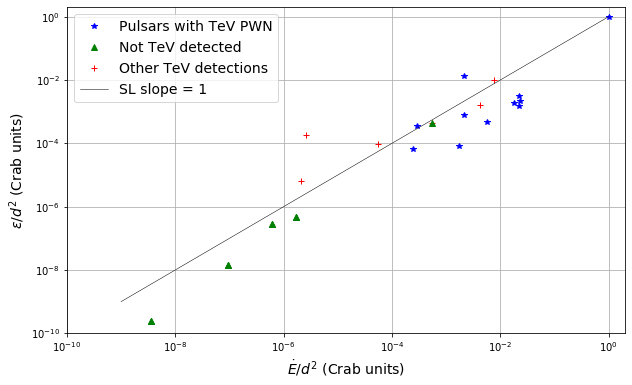

In [14]:
#newaxisy = newaxisy.tolist()
mask1 = newaxisy < 10**(-6)
print(mask1)
littleones = newaxisy[mask1]
#print(littleones[0],np.shape(newaxisy))
# We obtain the index of the values in littleones array
#index1 = newaxisy.index(littleones[0])
#index1 = np.where(newaxisy == littleones[0])
#print(index1[0],np.shape(index1))
#index2 = newaxisy.index(littleones[1])
#index3 = newaxisy.index(littleones[2])
#print(len(littleones))

masktmp = np.logical_not(mask1) * np.logical_not(truth)
print(sum(masktmp))

x2 = np.linspace(10**(-9),1,50)
plt.rcParams['figure.figsize'] = (10, 6)
#plt.loglog(ejey, ejex,'*')
plt.loglog(newaxisx[truth], newaxisy[truth],'b*',label='Pulsars with TeV PWN')
plt.loglog(newaxisx[mask1], newaxisy[mask1],'g^',label='Not TeV detected')
plt.loglog(newaxisx[masktmp], newaxisy[masktmp],'r+',label='Other TeV detections')
plt.loglog(newaxisx[mask1], newaxisy[mask1],'g^')
plt.loglog(newaxisx[7], newaxisy[7],'g^')

plt.loglog(x2, x2,'k',linewidth = 0.5, label='SL slope = 1')
#plt.title('Plot of Energy density ($\epsilon$) divided by distance square, normalised, against the spin down \n' 
#          'luminosity ($\dot{E}$) over distance square, normalised again for pulsars with ' r'$\tau < 7 $ kyr.')
plt.ylabel(r'$\varepsilon/d^2$ (Crab units)', fontsize=14)
plt.xlabel(r'$\dot{E}/d^2$ (Crab units)',fontsize=14)

plt.legend(loc='best', fontsize=14)
plt.xlim(10**(-10),2)
plt.ylim(10**(-10),2)

plt.grid(True)

# CHANGE INDEX 3 TO GREEN (^)

#figtst = plt.gcf()
#plt.show()
#plt.draw()
#figtst.savefig("pulsars_Energy_distancesq2.png",bbox_inches='tight')
#plt.savefig("e_against_d2goodone.png")
print('The yellow ones are not firmly identified, we dont know if they are from the pulsar or the supernova remmant.' 
      '\n The ones below 10**-6 have not been detected yet. It would be interesting to plot them in another color')

print('The correlation matrix is: \n', np.corrcoef(newaxisx, newaxisy))
print(names[masktmp])
print(masktmp)
print(newaxisy)
print(names)

In [11]:
# Possible tev detected
print(names[masktmp])
print(newaxisy[masktmp])
print(newaxisx[masktmp])

possible_tev_detectedNAMES=['J1513-5908','J1124-5916','J1841-0456','J1808-2024','J1550-5418','J1714-3810']  
possible_tev_detectedX=[7.80532599e-03,4.26666667e-03,9.54861111e-08,2.62984878e-06,5.55555556e-05,2.09162330e-06] 
possible_tev_detectedY=[1.01369359e-02,1.60862303e-03,1.48135648e-08,1.80412343e-04,9.27221198e-05,6.45524455e-06]  

['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1124-5916']
[1.80412343e-04 6.45524455e-06 9.27221198e-05 1.01369359e-02
 4.31867527e-04 1.60862303e-03]
[2.62984878e-06 2.09162330e-06 5.55555556e-05 7.80532599e-03
 5.39791398e-04 4.26666667e-03]


In [12]:
# not tev detected
print(names[mask1])
print(newaxisy[mask1])
print(newaxisx[mask1])
not_tev_detectedNAMES=['J1745-2900','J0540-6919','J0100-7211','J1050-5953']
not_tev_detectedX=[1.67739230e-06,5.39791398e-04 ,3.49161902e-09,6.14540466e-07]
not_tev_detectedY=[4.71308370e-07,4.31867527e-04 ,2.52408518e-10,2.78287637e-07]

['J1050-5953' 'J1745-2900' 'J1841-0456' 'J0100-7211']
[2.78287637e-07 4.71308370e-07 1.48135648e-08 2.52408518e-10]
[6.14540466e-07 1.67739230e-06 9.54861111e-08 3.49161902e-09]


6
The correlation matrix is: 
 [[1.         0.99925357]
 [0.99925357 1.        ]]
['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1124-5916']
[ True False  True False  True  True False  True False  True False False
 False False False False False False False False False]
[1.80412343e-04 1.29523386e-02 6.45524455e-06 1.00000000e+00
 9.27221198e-05 1.01369359e-02 3.64195579e-04 4.31867527e-04
 2.78287637e-07 1.60862303e-03 7.82841789e-04 6.77794293e-05
 4.71308370e-07 1.48135648e-08 3.18216043e-03 1.91735946e-03
 8.23564619e-05 4.73906412e-04 2.10357942e-03 1.49325284e-03
 2.52408518e-10]
['J1808-2024' 'J1846-0258' 'J1714-3810' 'J0534+2200' 'J1550-5418'
 'J1513-5908' 'J1119-6127' 'J0540-6919' 'J1050-5953' 'J1124-5916'
 'J1930+1852' 'J1640-4631' 'J1745-2900' 'J1841-0456' 'J1023-5746'
 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449' 'J1813-1749'
 'J0100-7211']


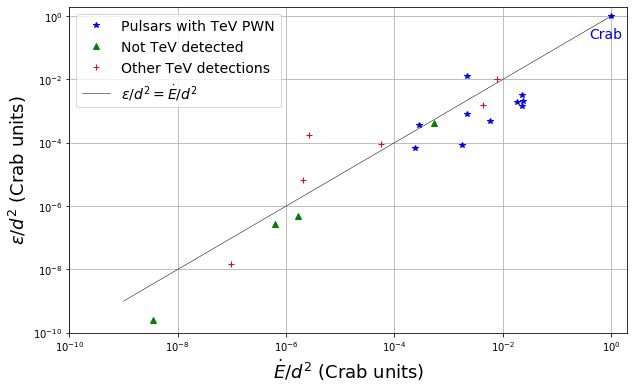

In [21]:
# With the three subsamples, we now obtain the final plot
mask1 = newaxisy < 10**(-6)
littleones = newaxisy[mask1]
newmask1=['J1050-5953','J1745-2900','J1841-0456','J0100-7211']
masktmp = np.logical_not(mask1) * np.logical_not(truth)
print(sum(masktmp))

x2 = np.linspace(10**(-9),1,50)
plt.rcParams['figure.figsize'] = (10, 6)
#plt.loglog(ejey, ejex,'*')
plt.loglog(newaxisx[truth], newaxisy[truth],'b*',label='Pulsars with TeV PWN')
plt.loglog(not_tev_detectedX, not_tev_detectedY,'g^',label='Not TeV detected')
plt.loglog(possible_tev_detectedX, possible_tev_detectedY,'r+',label='Other TeV detections')

plt.loglog(x2, x2,'k',linewidth = 0.5, label=r'$\varepsilon/d^2 = \dot{E}/d^2$')
plt.ylabel(r'$\varepsilon/d^2$ (Crab units)', fontsize=18)
plt.xlabel(r'$\dot{E}/d^2$ (Crab units)',fontsize=18)

plt.legend(loc='best', fontsize=14)
plt.xlim(10**(-10),2)
plt.ylim(10**(-10),2)

plt.text(0.4,0.2,'Crab',color='blue',fontsize=14)

plt.grid(True)

plt.savefig("energydensity7kyr.png")
print('The correlation matrix is: \n', np.corrcoef(newaxisx, newaxisy))
print(names[masktmp])
print(masktmp)
print(newaxisy)
print(names)

In [16]:
print(newaxisy[truth],'\n')
print(names[truth]) # 1, 3, 5, 6, 10, 15, 16 17 18 19
print('\n')
print(names)
print(len(names), len(names[truth]), len(names[masktmp]), len(names[mask1]))

[1.29523386e-02 1.00000000e+00 3.64195579e-04 7.82841789e-04
 6.77794293e-05 3.18216043e-03 1.91735946e-03 8.23564619e-05
 4.73906412e-04 2.10357942e-03 1.49325284e-03] 

['J1846-0258' 'J0534+2200' 'J1119-6127' 'J1930+1852' 'J1640-4631'
 'J1023-5746' 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449'
 'J1813-1749']


['J1808-2024' 'J1846-0258' 'J1714-3810' 'J0534+2200' 'J1550-5418'
 'J1513-5908' 'J1119-6127' 'J0540-6919' 'J1050-5953' 'J1124-5916'
 'J1930+1852' 'J1640-4631' 'J1745-2900' 'J1841-0456' 'J1023-5746'
 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449' 'J1813-1749'
 'J0100-7211']
21 11 6 4


In [17]:
for i in range(len(names[truth])):
    #print(names[truth][i], newaxisx[truth][i], newaxisy[truth][i])
    print(names[truth][i], np.log10(newaxisy[truth][i]), np.log10(newaxisx[truth][i]))

J1846-0258 -1.8876518100445039 -2.669523490694606
J0534+2200 0.0 0.0
J1119-6127 -3.4386653300733516 -3.5379832585535516
J1930+1852 -3.1063259991840453 -2.66216735642827
J1640-4631 -4.16890209253718 -3.6187202155011415
J1023-5746 -2.4972779288220224 -1.6458865072146793
J1833-1034 -2.7172964589961706 -1.7452413188445972
J0537-6910 -4.0843023193081605 -2.753669219885532
J1747-2809 -3.3243074151440357 -2.238932876646197
J0205+6449 -2.677041085751199 -1.630088714928206
J1813-1749 -2.8258666507167773 -1.6471602113126158


In [37]:
print(names[mask1])
print(newaxisy[mask1])
print(newaxisx[mask1])
print('\n', names[7], newaxisy[7])

['J1050-5953' 'J1745-2900' 'J1841-0456' 'J0100-7211']
[2.78287637e-07 4.71308370e-07 1.48135648e-08 2.52408518e-10]
[6.14540466e-07 1.67739230e-06 9.54861111e-08 3.49161902e-09]

 J0540-6919 0.00043186752698020725


In [18]:
print(names[mask1])
print(10**newaxisx[mask1])
print(newaxisy[np.logical_not(truth)],names[np.logical_not(truth)])

['J1050-5953' 'J1745-2900' 'J1841-0456' 'J0100-7211']
[1.00000142 1.00000386 1.00000022 1.00000001]
[1.80412343e-04 6.45524455e-06 9.27221198e-05 1.01369359e-02
 4.31867527e-04 2.78287637e-07 1.60862303e-03 4.71308370e-07
 1.48135648e-08 2.52408518e-10] ['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1050-5953' 'J1124-5916' 'J1745-2900' 'J1841-0456' 'J0100-7211']


In [19]:
print(names[masktmp])
print(newaxisy[masktmp])

['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1124-5916']
[1.80412343e-04 6.45524455e-06 9.27221198e-05 1.01369359e-02
 4.31867527e-04 1.60862303e-03]


In [22]:
print(names[truth])
print('\n')
print(newaxisx[truth])
print('\n')
print(newaxisy[truth])

['J1846-0258' 'J0534+2200' 'J1119-6127' 'J1930+1852' 'J1640-4631'
 'J1023-5746' 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449'
 'J1813-1749']


[2.14030916e-03 1.00000000e+00 2.89745528e-04 2.17687075e-03
 2.40591226e-04 2.26002630e-02 1.79787164e-02 1.76331857e-03
 5.76855614e-03 2.34375000e-02 2.25340778e-02]


[1.29523386e-02 1.00000000e+00 3.64195579e-04 7.82841789e-04
 6.77794293e-05 3.18216043e-03 1.91735946e-03 8.23564619e-05
 4.73906412e-04 2.10357942e-03 1.49325284e-03]


In [23]:
np.sort(newaxisx)

array([3.49161902e-09, 9.54861111e-08, 6.14540466e-07, 1.67739230e-06,
       2.09162330e-06, 2.62984878e-06, 5.55555556e-05, 2.40591226e-04,
       2.89745528e-04, 5.39791398e-04, 1.76331857e-03, 2.14030916e-03,
       2.17687075e-03, 4.26666667e-03, 5.76855614e-03, 7.80532599e-03,
       1.79787164e-02, 2.25340778e-02, 2.26002630e-02, 2.34375000e-02,
       1.00000000e+00])

In [24]:
print(names)
print(names[truth])
print(names[masktmp])
print(names[mask1])

['J1808-2024' 'J1846-0258' 'J1714-3810' 'J0534+2200' 'J1550-5418'
 'J1513-5908' 'J1119-6127' 'J0540-6919' 'J1050-5953' 'J1124-5916'
 'J1930+1852' 'J1640-4631' 'J1745-2900' 'J1841-0456' 'J1023-5746'
 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449' 'J1813-1749'
 'J0100-7211']
['J1846-0258' 'J0534+2200' 'J1119-6127' 'J1930+1852' 'J1640-4631'
 'J1023-5746' 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449'
 'J1813-1749']
['J1808-2024' 'J1714-3810' 'J1550-5418' 'J1513-5908' 'J0540-6919'
 'J1124-5916']
['J1050-5953' 'J1745-2900' 'J1841-0456' 'J0100-7211']


[2.75292075 3.71577657 2.40652863 1.52360982 1.69758666 1.25256532
 1.61065797 1.44697545 1.63204564]
[1.6, 3.6, 0.0, -1.2, 0.9, -0.7, 2.1, 2.3, 2.4]
The correlation matrix is: 
 [[1.         0.50754515]
 [0.50754515 1.        ]]


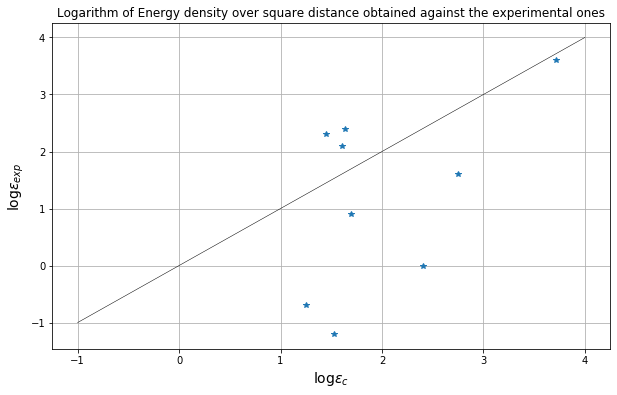

In [20]:
################################ PLOT ENERGY DENSITY against THEORETICAL ONE ############################
# The calculated is epsilon, but we only want the ones that appear in Table
#energycalc = [epsilon2[1], epsilon2[3], epsilon2[5], epsilon2[6], epsilon2[10], epsilon2[14], epsilon2[17], epsilon2[18],epsilon2[19]]
energycalc = [epsilon[1], epsilon[3], epsilon[5], epsilon[6], epsilon[10], epsilon[14], epsilon[17], epsilon[18],epsilon[19]]

# Convert it into logarithm
energycalc = np.log10(energycalc)
energyexp = [1.6, 3.6, 0.0, -1.2, 0.9, -0.7, 2.1, 2.3, 2.4]

print(energycalc)
print(energyexp)
x3 = np.linspace(-1,4,50)

plt.rcParams['figure.figsize'] = (10, 6)
#plt.loglog(ejey, ejex,'*')
plt.plot(energycalc, energyexp,'*')
plt.plot(x3, x3,'k',linewidth = 0.5)
plt.title('Logarithm of Energy density over square distance obtained against the experimental ones')
plt.ylabel(r'$\log{\varepsilon_{exp}}$', fontsize=14)
plt.xlabel(r'$ \log{\varepsilon_{c}}$',fontsize=14)

plt.grid(True)

#plt.savefig("energydensity_compared2")

print('The correlation matrix is: \n', np.corrcoef(energycalc, energyexp))

[ 0.98474988  2.25115301  0.65406998 -0.24612824 -0.05052676 -0.48358027
 -0.01310771 -0.22703714  0.05304059]
[1.6, 3.6, 0.0, -1.2, 0.9, -0.7, 2.1, 2.3, 2.4]
The correlation matrix is: 
 [[1.         0.57517392]
 [0.57517392 1.        ]]


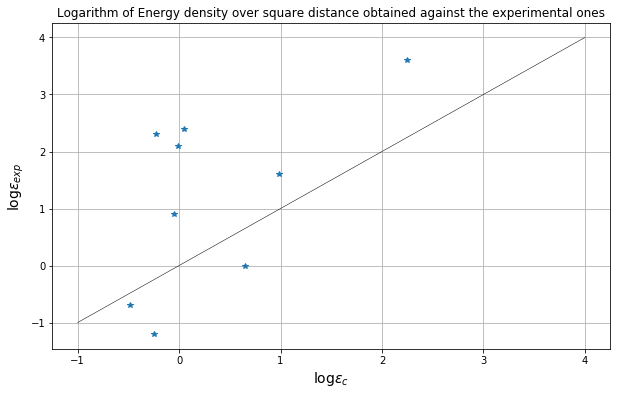

In [29]:
#print('Comparing values, number 15 is J1833-1034 because their values obtained are: \n', LogE[15], Logep[15], tau[15], distance[15])
#print('LogE, Log energy density, tau_c, distance, respectively')
print('J1833-1034 is number 15') 
print('J1813-1749 is number 19')
print('J1930+1852 is number 10')
print('J1846-0258 is number 1')
print('J1513-5908, named J1514-591 too, is number 5')
print('J1119-6127 is number 6')
print('J0537-6910 (N157B) is number 16')
print('J0534-3810 (Crab Nebula) is number 3')
print('J1747-2809 (G0.9+0.1) is number 17')
print('J0205+6449 (3C 58) is number 18') 
# NUMBER 14 IS THERE TOO
print(names)

J1833-1034 is number 15
J1813-1749 is number 19
J1930+1852 is number 10
J1846-0258 is number 1
J1513-5908, named J1514-591 too, is number 5
J1119-6127 is number 6
J0537-6910 (N157B) is number 16
J0534-3810 (Crab Nebula) is number 3
J1747-2809 (G0.9+0.1) is number 17
J0205+6449 (3C 58) is number 18
['J1808-2024' 'J1846-0258' 'J1714-3810' 'J0534+2200' 'J1550-5418'
 'J1513-5908' 'J1119-6127' 'J0540-6919' 'J1050-5953' 'J1124-5916'
 'J1930+1852' 'J1640-4631' 'J1745-2900' 'J1841-0456' 'J1023-5746'
 'J1833-1034' 'J0537-6910' 'J1747-2809' 'J0205+6449' 'J1813-1749'
 'J0100-7211']
